In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5) #df.head()

,label,body,Unnamed: 2,Unnamed: 3,Unnamed: 4
3650,ham,Want to send me a virtual hug?... I need one,NaN,NaN,NaN
2840,ham,Ok thanx...,NaN,NaN,NaN
4351,ham,Hows the pain dear?y r u smiling?,NaN,NaN,NaN
3119,ham,Good evening! this is roger. How are you?,NaN,NaN,NaN
1086,ham,I don't think he has spatula hands!,NaN,NaN,NaN


In [4]:
df.shape #(Rows, Columns)

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   body        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,label,body
112,ham,I'm ok wif it cos i like 2 try new things. But...
218,ham,I have to take exam with march 3
421,spam,Someone has contacted our dating service and e...
3020,ham,Am in film ill call you later.
1058,ham,Tell me they're female :V how're you throwing ...


In [8]:
# renaming the cols
df.rename(columns={'label':'target','body':'text'},inplace=True)
df.sample(5)

,target,text
3361,ham,No messages on her phone. I'm holding it now
842,ham,Our Prashanthettan's mother passed away last n...
1242,ham,Nobody can decide where to eat and dad wants C...
2416,ham,"Could you not read me, my Love ? I answered you"
1436,ham,I jus hope its true that missin me cos i'm re...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

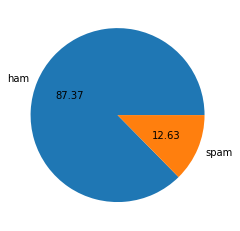

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk #Natural Language Tool Kit

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chandan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

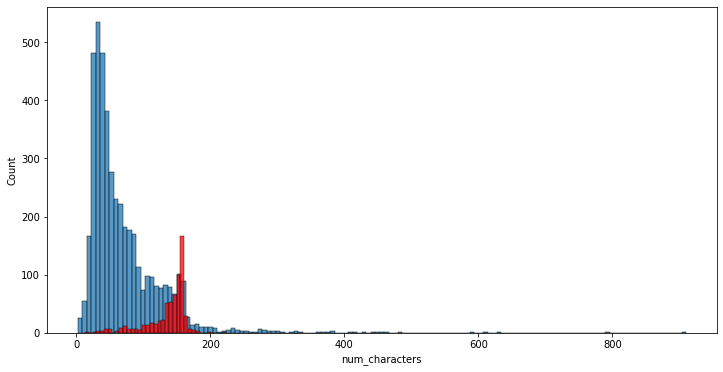

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

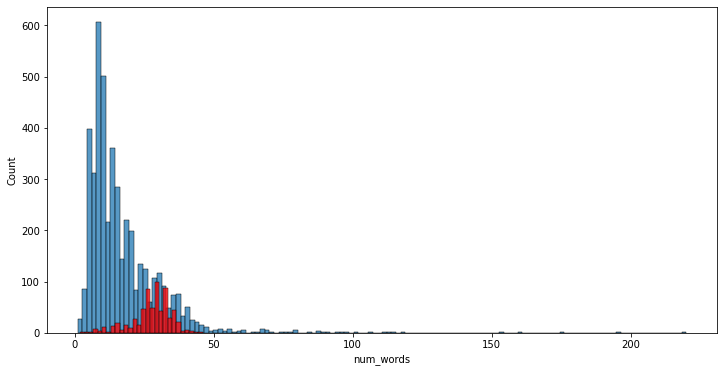

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

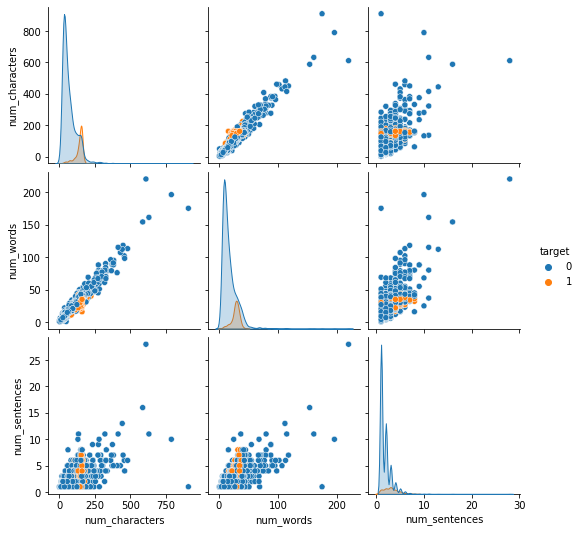

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

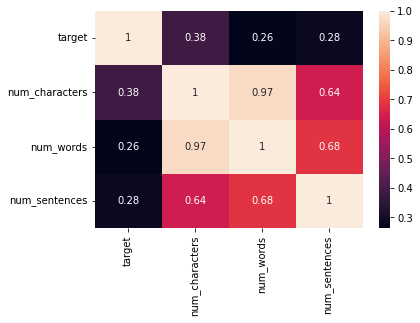

In [35]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Removing stop words
- Removing punctuation
- Tokenization
- Stemming

In [36]:
#Lower Case
df['text'].str.lower()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5169, dtype: object

In [37]:
lower_count = sum(1 for ele in df['text'].str.count(r'[A-Z]'))

In [38]:
lower_count

5169

In [39]:
df['text'].str.isupper()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: text, Length: 5169, dtype: bool

In [40]:
#Stopword removal
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [42]:
df['clean_text']

0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5567    This 2nd time tried 2 contact u. U å£750 Pound...
5568                   Will Ì_ b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy bitching I acted like i'd interested b...
5571                                  Rofl. Its true name
Name: clean_text, Length: 5169, dtype: object

In [43]:
#Removing Punctuations
import string
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [44]:
df['clean_text'] = df['clean_text'].apply(remove_punc)

In [45]:
df['clean_text']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5567    This 2nd time tried 2 contact u U å£750 Pound ...
5568                     Will Ì b going esplanade fr home
5569                    Pity  mood that Soany suggestions
5570    The guy bitching I acted like id interested bu...
5571                                   Rofl Its true name
Name: clean_text, Length: 5169, dtype: object

In [46]:
#Tokenization
from nltk.tokenize import word_tokenize
df['clean_text'].apply(word_tokenize)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, think, goes, usf, lives, around, though]
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, å£7...
5568             [Will, Ì, b, going, esplanade, fr, home]
5569               [Pity, mood, that, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: clean_text, Length: 5169, dtype: object

In [47]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Colleges')

'colleg'

In [48]:
df['clean_text'] = df['clean_text'].apply(ps.stem)

In [49]:
df['clean_text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah i think goes usf lives around though
                              ...                        
5567    this 2nd time tried 2 contact u u å£750 pound ...
5568                      will ì b going esplanade fr hom
5569                        pity  mood that soany suggest
5570    the guy bitching i acted like id interested bu...
5571                                    rofl its true nam
Name: clean_text, Length: 5169, dtype: object

In [50]:
df.head(10)

,target,text,num_characters,num_words,num_sentences,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goes usf lives around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darling 3 weeks word back id like ...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak me they treat like aid...
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,as per request melle melle oru minnaminunginte...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner as valued network customer selected rec...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,had mobile 11 months more u r entitled update ...


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=" "))

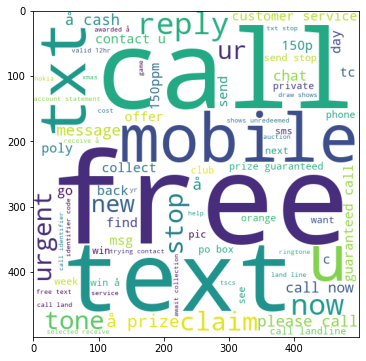

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=" "))

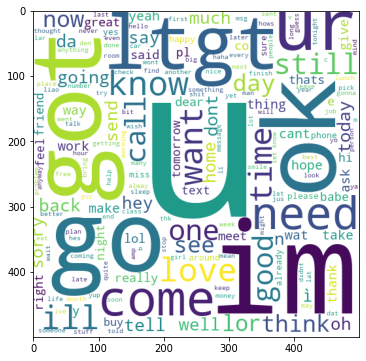

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goes usf lives around though


In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

11743

C:\Users\Chandan\anaconda3\envs\spam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


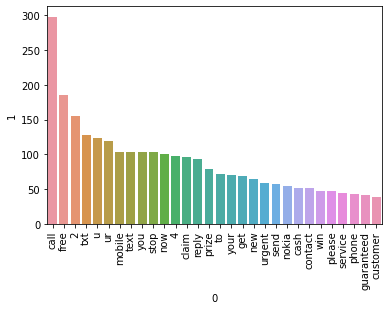

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus = []
for msg in df[df['target'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

42670

C:\Users\Chandan\anaconda3\envs\spam\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


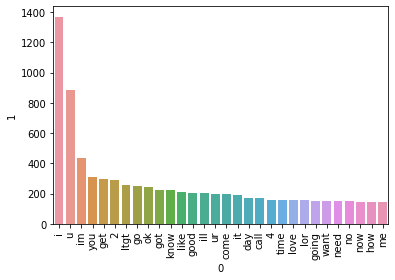

In [63]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [74]:
X = tfidf.fit_transform(df['clean_text']).toarray()

In [76]:
y = df['target'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
#Gaussian Naïve Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8926499032882012
[[803  93]
 [ 18 120]]
0.5633802816901409


In [84]:
#Multinomial Naïve Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [85]:
#Bernoulli Naïve Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [86]:
#import pickle
#pickle.dump(tfidf,open('vectorizer.pickle','wb'))
#pickle.dump(mnb,open('model.pickle','wb'))